# Vehicle Detection by Jay

In [1]:
import cv2
from lesson_functions import *
import visialize_funcs as vis_funcs
import time

In [2]:
%matplotlib inline

## load images

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog
from sklearn.model_selection import train_test_split

# Read in our vehicles
car_images = glob.glob('vehicles/*/*.png')
not_car_images = glob.glob('non-vehicles/*/*.png')
np.random.shuffle(car_images)
np.random.shuffle(not_car_images)

## HOG 

Text(0.5,1,'Not car')

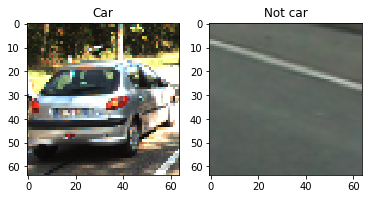

In [66]:
# Generate random indexs
ind = np.random.randint(0, len(car_images))
ind2 = np.random.randint(0, len(not_car_images))
# Read in the image
car_image = mpimg.imread(car_images[ind])
noncar_image = mpimg.imread(not_car_images[ind2])

# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(car_image)
plt.title('Car')
plt.subplot(122)
plt.imshow(noncar_image)
plt.title('Not car')

In [95]:
color_space = 'YCrCb'
spatial_size = (32, 32)
hist_bins = 64
orient = 16
pix_per_cell = 4
cell_per_block = 2
hog_channel = 'ALL' # 0,1,2,'ALL'
spatial_feat = True
hist_feat = True
hog_feat = True
bins_range = (0, 256)

In [118]:
import visialize_funcs as vis_funcs
import lesson_functions as less_funcs
import importlib
importlib.reload(vis_funcs)
importlib.reload(less_funcs)

<module 'lesson_functions' from '/Users/jay/git/auto_drive/vehicle_detection/lesson_functions.py'>

In [127]:
def plt_features(car_image, noncar_image, color_space):

    # hog for YCrCb
    car_transformed, car_ch_hog_images, car_spatial_image, car_hist_features, car_hog_features = vis_funcs.visialize_hog_image_and_color_hist(car_image, color_space, orient, 
                                                        pix_per_cell, cell_per_block, 
                                                        nbins=hist_bins, bins_range=(0, 256), spatial_size=spatial_size)
    noncar_transformed, noncar_ch_hog_images, noncar_spatial_image, noncar_hist_features, noncar_hog_features = vis_funcs.visialize_hog_image_and_color_hist(noncar_image, color_space, orient, 
                                                         pix_per_cell, cell_per_block, 
                                                        nbins=hist_bins, bins_range=(0, 256), spatial_size=spatial_size)
    fig = plt.figure(figsize=(10, 14))
    # ----- gray hog
    plt.subplot(5, 4, 1)
    plt.imshow(car_image)
    plt.title('Car')

    plt.subplot(5, 4, 2)
    plt.plot(car_hog_features)
    plt.title('Car {} hog hist'.format(color_space))

    plt.subplot(5, 4, 3)
    plt.imshow(noncar_image)
    plt.title('Not-Car')

    plt.subplot(5, 4, 4)
    plt.plot(noncar_hog_features)
    plt.title('Not-Car {} hog hist'.format(color_space))
    # ----- bin spatial

    plt.subplot(5, 4, 5)
    plt.plot(car_hist_features.ravel())
    plt.title('Car hist')

    plt.subplot(5, 4, 6)
    plt.plot(car_spatial_image.ravel())
    plt.title('Car Spatail hist')

    plt.subplot(5, 4, 7)
    plt.plot(noncar_hist_features.ravel())
    plt.title('Not-Car hist')

    plt.subplot(5, 4, 8)
    plt.plot(noncar_spatial_image.ravel())
    plt.title('Not-Car Spatail hist')

    # ------ YCrCb hog ch1
    plt.subplot(5, 4, 9)
    plt.imshow(car_transformed[:,:,0], cmap='gray')
    plt.title('Car {} ch1'.format(color_space))

    plt.subplot(5, 4, 10)
    plt.imshow(car_ch_hog_images[0], cmap='gray')
    plt.title('Car {} ch1 hog'.format(color_space))

    plt.subplot(5, 4, 11)
    plt.imshow(noncar_transformed[:,:,0], cmap='gray')
    plt.title('Not-Car {} ch1'.format(color_space))

    plt.subplot(5, 4, 12)
    plt.imshow(noncar_ch_hog_images[0], cmap='gray')
    plt.title('Not-Car {} ch1 hog'.format(color_space))

    # ------ YCrCb hog ch2
    plt.subplot(5, 4, 13)
    plt.imshow(car_transformed[:,:,1], cmap='gray')
    plt.title('Car {} ch2'.format(color_space))

    plt.subplot(5, 4, 14)
    plt.imshow(car_ch_hog_images[1], cmap='gray')
    plt.title('Car {} ch2 hog'.format(color_space))

    plt.subplot(5, 4, 15)
    plt.imshow(noncar_transformed[:,:,1], cmap='gray')
    plt.title('Not-Car {} ch2'.format(color_space))

    plt.subplot(5, 4, 16)
    plt.imshow(noncar_ch_hog_images[1], cmap='gray')
    plt.title('Not-Car {} ch2 hog'.format(color_space))

    # ------ YCrCb hog ch3
    plt.subplot(5, 4, 17)
    plt.imshow(car_transformed[:,:,2], cmap='gray')
    plt.title('Car {} ch3'.format(color_space))

    plt.subplot(5, 4, 18)
    plt.imshow(car_ch_hog_images[2], cmap='gray')
    plt.title('Car {} ch3 hog'.format(color_space))

    plt.subplot(5, 4, 19)
    plt.imshow(noncar_transformed[:,:,2], cmap='gray')
    plt.title('Not-Car {} ch3'.format(color_space))

    plt.subplot(5, 4, 20)
    plt.imshow(noncar_ch_hog_images[2], cmap='gray')
    plt.title('Not-Car {} ch3 hog'.format(color_space))


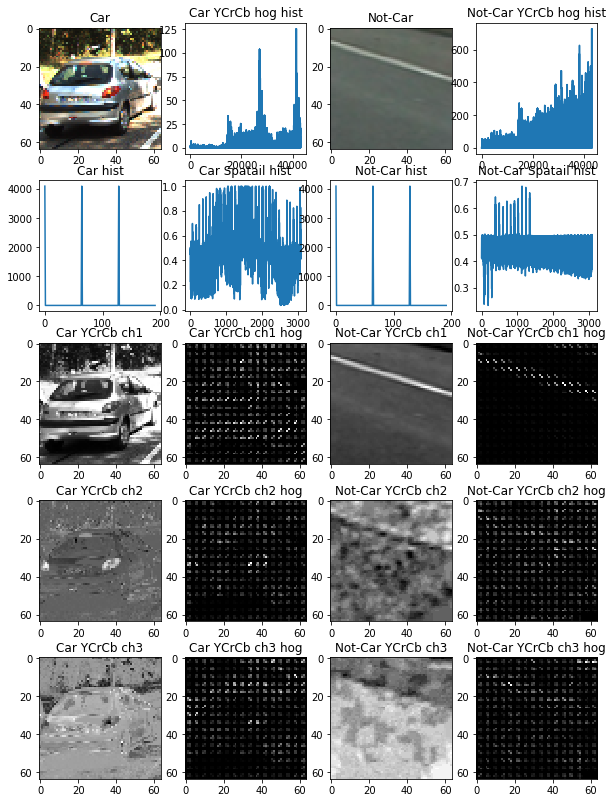

In [128]:
plt_features(car_image, noncar_image, 'YCrCb')

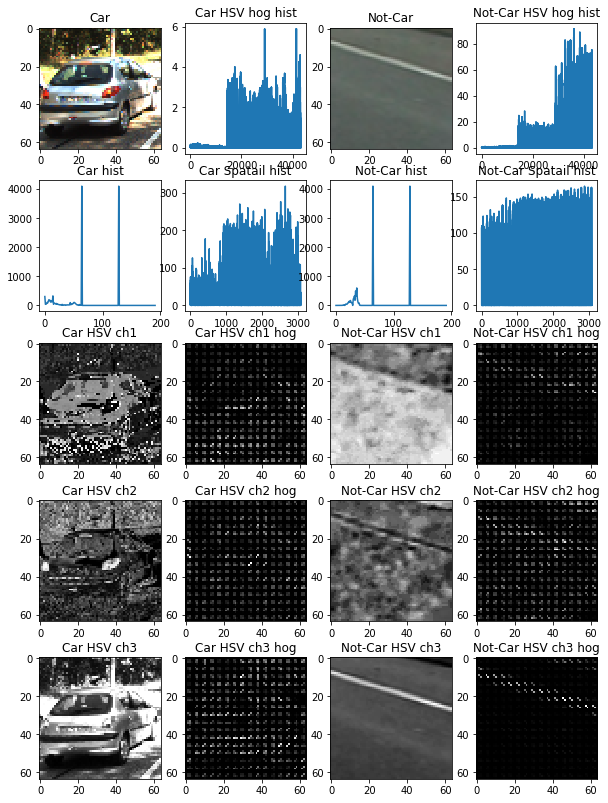

In [129]:
plt_features(car_image, noncar_image, 'HSV')

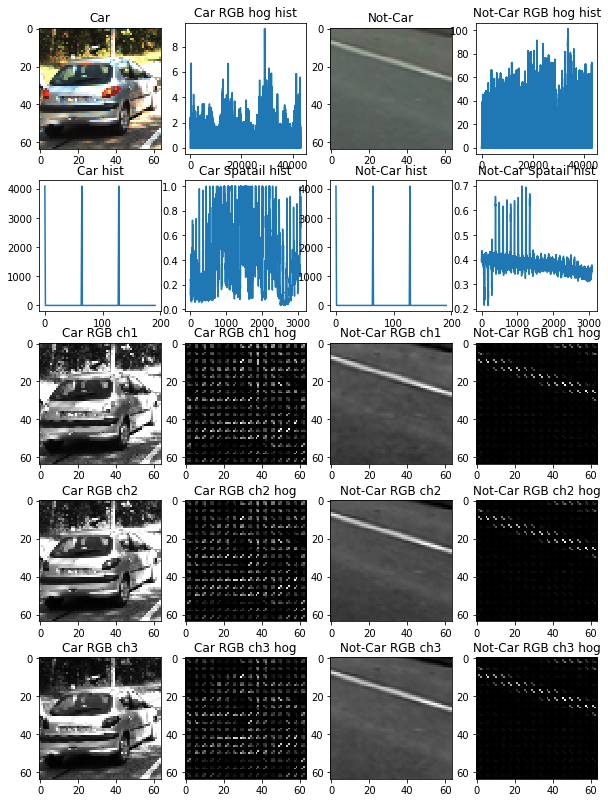

In [130]:
plt_features(car_image, noncar_image, 'RGB')

## Settle parameters

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import LinearSVC
import time

In [5]:
color_space = 'YCrCb'
spatial_size = (32, 32)
hist_bins = 32
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL' # 0,1,2,'ALL'
spatial_feat = True
hist_feat = True
hog_feat = True

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [42]:
def train(color_space, spatial_size=spatial_size, hist_bins=hist_bins, orient=orient, 
          pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
          hog_channel=hog_channel, spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat) :
    t_before_extrace_feature = time.time()
    my_car_images = car_images[:1000]
    my_noncar_images = not_car_images[:1000]
    car_features = extract_features(my_car_images, color_space, spatial_size, hist_bins, 
                                    orient, pix_per_cell, cell_per_block, hog_channel,
                                    spatial_feat, hist_feat, hog_feat)
    notcar_features = extract_features(my_noncar_images,  color_space, spatial_size, hist_bins, 
                                    orient, pix_per_cell, cell_per_block, hog_channel,
                                    spatial_feat, hist_feat, hog_feat)
    print(round(time.time() - t_before_extrace_feature, 2), 'Seconds to extract features')
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    y = np.hstack((np.ones(len(car_features)), 
                   np.zeros(len(notcar_features))))
    rand_state = 20 #np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

    # Fit a per-column scaler
    from sklearn.preprocessing import StandardScaler
    t_before_fit = time.time()
    X_scaler = StandardScaler().fit(X_train)
    # Apply the scaler to X
    scaled_X_train = X_scaler.transform(X_train)
    scaled_X_test = X_scaler.transform(X_test)
    print(round(time.time() - t_before_fit, 2), 'Seconds to fit and transform scaler')

    # Use a linear SVC (support vector classifier)
    svc = SVC(kernel='linear')
    # Train the SVC
    t=time.time()
    svc.fit(scaled_X_train, y_train)
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to train SVC...')
    print('Test Accuracy of SVC = ', svc.score(scaled_X_test, y_test))
    return svc, X_scaler

In [19]:
train('RGB')

7.6 Seconds to extract features
0.21 Seconds to fit and transform scaler
1.86 Seconds to train SVC...
Test Accuracy of SVC =  0.945


(SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 StandardScaler(copy=True, with_mean=True, with_std=True))

In [30]:
train('HSV')

135.09 Seconds to extract features
10.98 Seconds to fit and transform scaler
41.6 Seconds to train SVC...
Test Accuracy of SVC =  0.980855855856


In [31]:
train('YCrCb')

132.08 Seconds to extract features
10.37 Seconds to fit and transform scaler
34.23 Seconds to train SVC...
Test Accuracy of SVC =  0.984234234234


In [ ]:
# ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# train('YUV') 

In [32]:
train('HLS')

133.59 Seconds to extract features
14.22 Seconds to fit and transform scaler
38.32 Seconds to train SVC...
Test Accuracy of SVC =  0.982545045045


In [ ]:
# ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# train('LUV')

train('HSV', spatial_feat=False, hist_feat=False)

In [33]:
train('YCrCb', hist_bins=64)

132.42 Seconds to extract features
13.32 Seconds to fit and transform scaler
37.54 Seconds to train SVC...
Test Accuracy of SVC =  0.984234234234


In [34]:
train('YCrCb', hist_bins=16)

131.08 Seconds to extract features
13.36 Seconds to fit and transform scaler
34.47 Seconds to train SVC...
Test Accuracy of SVC =  0.984234234234


In [35]:
train('YCrCb', orient=16)

139.21 Seconds to extract features
26.56 Seconds to fit and transform scaler
71.22 Seconds to train SVC...
Test Accuracy of SVC =  0.985923423423


In [36]:
train('YCrCb', orient=16, hist_bins=16)

141.05 Seconds to extract features
27.41 Seconds to fit and transform scaler
62.57 Seconds to train SVC...
Test Accuracy of SVC =  0.985923423423


In [37]:
train('YCrCb', hog_channel=0)

61.01 Seconds to extract features
2.59 Seconds to fit and transform scaler
21.47 Seconds to train SVC...
Test Accuracy of SVC =  0.960304054054


In [40]:
train('YCrCb', cell_per_block=4)

125.84 Seconds to extract features
50.44 Seconds to fit and transform scaler
87.08 Seconds to train SVC...
Test Accuracy of SVC =  0.986768018018


In [38]:
train('YCrCb', orient=16, spatial_feat=False)

135.21 Seconds to extract features
12.13 Seconds to fit and transform scaler
58.06 Seconds to train SVC...
Test Accuracy of SVC =  0.96509009009


In [39]:
train('YCrCb', orient=16, hist_feat=False)

130.68 Seconds to extract features
16.24 Seconds to fit and transform scaler
67.93 Seconds to train SVC...
Test Accuracy of SVC =  0.985923423423


## Sliding Window Search

In [31]:
color_space = 'YCrCb'
spatial_size = (32, 32)
hist_bins = 32
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 2 # 0,1,2,'ALL'
spatial_feat = True
hist_feat = True
hog_feat = True

3.51 Seconds to extract features
0.12 Seconds to fit and transform scaler
1.5 Seconds to train SVC...
Test Accuracy of SVC =  0.935


In [38]:
import lesson_functions as less_funcs
import importlib
importlib.reload(less_funcs)

<module 'lesson_functions' from '/Users/jay/git/auto_drive/vehicle_detection/lesson_functions.py'>

In [135]:
def train(color_space, example_size_scale, spatial_size=spatial_size, hist_bins=hist_bins, orient=orient, 
          pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
          hog_channel=hog_channel, spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat) :
    t_before_extrace_feature = time.time()
    my_car_images = car_images[:int(example_size_scale * len(car_images) - 1)]
    my_noncar_images = not_car_images[:int(example_size_scale * len(not_car_images) - 1)]
    car_features = extract_features(my_car_images, color_space, spatial_size, hist_bins, 
                                    orient, pix_per_cell, cell_per_block, hog_channel,
                                    spatial_feat, hist_feat, hog_feat)
    notcar_features = extract_features(my_noncar_images,  color_space, spatial_size, hist_bins, 
                                    orient, pix_per_cell, cell_per_block, hog_channel,
                                    spatial_feat, hist_feat, hog_feat)
    print(round(time.time() - t_before_extrace_feature, 2), 'Seconds to extract features')
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    y = np.hstack((np.ones(len(car_features)), 
                   np.zeros(len(notcar_features))))
    rand_state = np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

    # Fit a per-column scaler
    from sklearn.preprocessing import StandardScaler
    t_before_fit = time.time()
    X_scaler = StandardScaler().fit(X_train)
    # Apply the scaler to X
    scaled_X_train = X_scaler.transform(X_train)
    scaled_X_test = X_scaler.transform(X_test)
    print(round(time.time() - t_before_fit, 2), 'Seconds to fit and transform scaler')

    # Use a linear SVC (support vector classifier)
    svc = SVC(kernel='linear', gamma=1.0)
    # Train the SVC
    t=time.time()
    svc.fit(scaled_X_train, y_train)
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to train SVC...')
    print('Test Accuracy of SVC = ', svc.score(scaled_X_test, y_test))
    return svc, X_scaler

78.23 Seconds to extract features
5.8 Seconds to fit and transform scaler
54.93 Seconds to train SVC...
Test Accuracy of SVC =  0.983108108108
0.0 Seconds to slide windows...
1.35 Seconds to search windows...
total: 91 , has car: 91


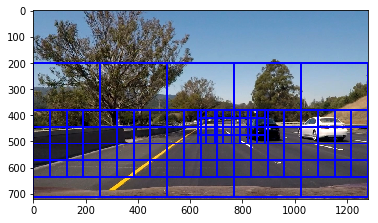

In [140]:
color_space = 'YCrCb'
spatial_size = (32, 32)
hist_bins = 32
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL' # 0,1,2,'ALL'
spatial_feat = True
hist_feat = False
hog_feat = True
example_size = 0.5
clf, scaler = train(color_space, example_size, hog_channel=hog_channel)

image = mpimg.imread('test_images/test6.jpg')

t_before_sliding =time.time()

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[200, None], 
                    xy_window=(512, 512), xy_overlap=(0.5, 0.5))

windows1 = slide_window(image, x_start_stop=[None, None], y_start_stop=[380, 636], 
                    xy_window=(256, 256), xy_overlap=(0.5, 0.5))

windows2 = slide_window(image, x_start_stop=[None, None], y_start_stop=[380, 636], 
                    xy_window=(128, 128), xy_overlap=(0.5, 0.5))
windows3 = slide_window(image, x_start_stop=[630, 900], y_start_stop=[380, 530], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5))
# windows_all = np.concatenate((windows, windows1, windows2, windows3, windows4, windows5))
windows_all = []
windows_all.extend(windows)
windows_all.extend(windows1)
windows_all.extend(windows2)
windows_all.extend(windows3)

t_after_sliding = time.time()
print(round(t_after_sliding-t_before_sliding, 2), 'Seconds to slide windows...')

on_windows = less_funcs.search_windows(image, windows_all, clf, scaler, color_space, hog_channel=hog_channel)
t_search = time.time()
print(round(t_search - t_after_sliding, 2), 'Seconds to search windows...')
print('total:', len(windows_all), ', has car:', len(on_windows))
window_img = less_funcs.draw_boxes(image, on_windows, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img)

In [52]:
def predict(test_img):
    features = less_funcs.single_img_features(test_img, color_space='RGB',
                        spatial_size=spatial_size, hist_bins=hist_bins,
                        orient=orient, pix_per_cell=pix_per_cell,
                        cell_per_block=cell_per_block,
                        hog_channel=0, spatial_feat=spatial_feat,
                        hist_feat=hist_feat, hog_feat=hog_feat)
    #5) Scale extracted features to be fed to classifier
    test_features = scaler.transform(np.array(features).reshape(1, -1))
    #6) Predict using your classifier
    prediction = clf.predict(test_features)
    print(prediction)


[ 0.]


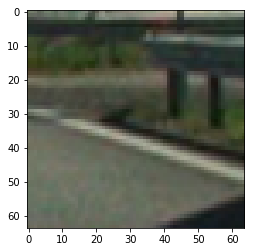

In [53]:
image = mpimg.imread(not_car_images[10])
predict(image)
plt.imshow(image)

In [28]:
image = mpimg.imread(car_images[100])
print(image.shape)
predict(image)

(64, 64, 3)
[ 1.]


[ 1.]


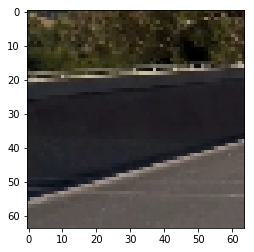

In [61]:
window = windows_all[4]
img = mpimg.imread('test_images/test6.jpg')
test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))

predict(test_img)
plt.imshow(test_img)

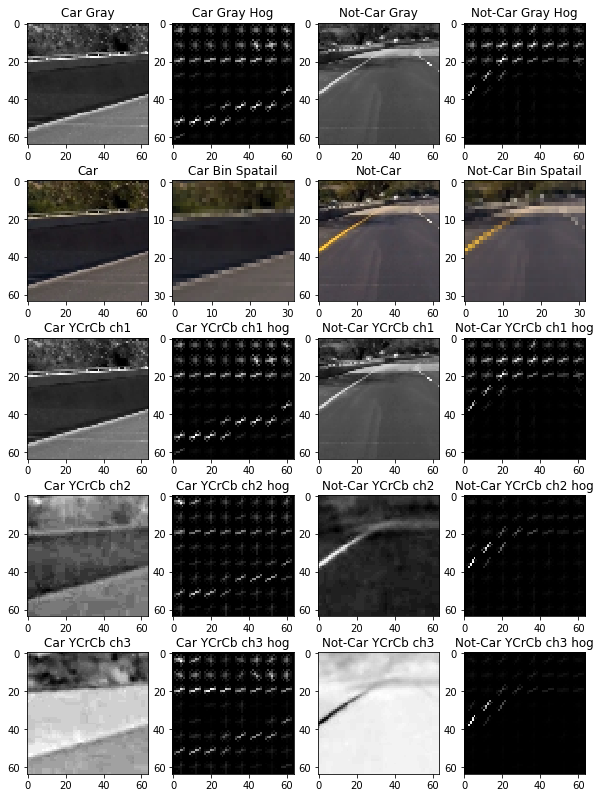

In [62]:
window = windows_all[4]
test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))
window2 = windows_all[8]
test_img2 = cv2.resize(img[window2[0][1]:window2[1][1], window2[0][0]:window2[1][0]], (64, 64))
plt_features(test_img, test_img2)